In [1]:
%matplotlib notebook

In [2]:
import pyforest
sys.path.append(str(Path.cwd().parent.absolute()))

In [3]:
from pytorch_grad_cam import GradCAMPlusPlus
from pytorch_grad_cam.utils.image import preprocess_image, show_cam_on_image, scale_cam_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputSoftmaxTarget

In [4]:
from temp.resnet import ResNet18
from common.dataset import DogCat

In [5]:
def imshow(imgs):
    if not isinstance(imgs, list): imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        axs[0, i].imshow(img)
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [6]:
def make_grid(imgs, nrow=None):
    imgs = [TF.to_tensor(x) for x in imgs]
    nrow = int(np.ceil(np.sqrt(len(imgs)))) if nrow is None else nrow
    imgs = torchvision.utils.make_grid(imgs, nrow=nrow)
    imgs = TF.to_pil_image(imgs)
    return imgs

In [7]:
def calc_grad_cam(image, model, layer='layer4', label=None, use_cuda=True):
    device = 'cuda' if use_cuda else 'cpu'
    model = model.eval().to(device)

    input_tensor = preprocess_image(
        TF.resize(image, 224),
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225)
    ).to(device)
    targets = None if label is None else [ClassifierOutputSoftmaxTarget(label)]

    gradcam = GradCAMPlusPlus(
        model=model,
        target_layers=[getattr(model, layer)[-1]],
        use_cuda=use_cuda
    )
    heatmap = gradcam(input_tensor=input_tensor, targets=targets)
    weights = gradcam.weights
    indices = np.argsort(weights)[::-1]

    gcams = []
    image = np.float32(image) / 255
    for i in indices:
        if not weights[i] > 0: continue
        igcam = show_cam_on_image(img=image, mask=heatmap[i], use_rgb=True, image_weight=0.5)
        gcams.append(igcam)

    return gcams

In [8]:
write = False
trans = {'cat': 0, 'dog': 1}
imagd = Path('/data/dogcat/test1/9203.jpg')
model = ResNet18(num_classes=2, feat_dim=1024)
ckptd = Path('/projects/CWCL/ckpts/dogcat.bak')
image = Image.open(imagd)
image = T.Compose([T.Resize(224), T.CenterCrop(224)])(image)
iio.imwrite(f'/projects/CWCL/temp/cams/{imagd.stem}.0.jpg', image)
layer = 'layer4'
label = None
epoch = 118

In [9]:
!rm -rf /projects/CWCL/temp/cams/**

242


<IPython.core.display.Javascript object>


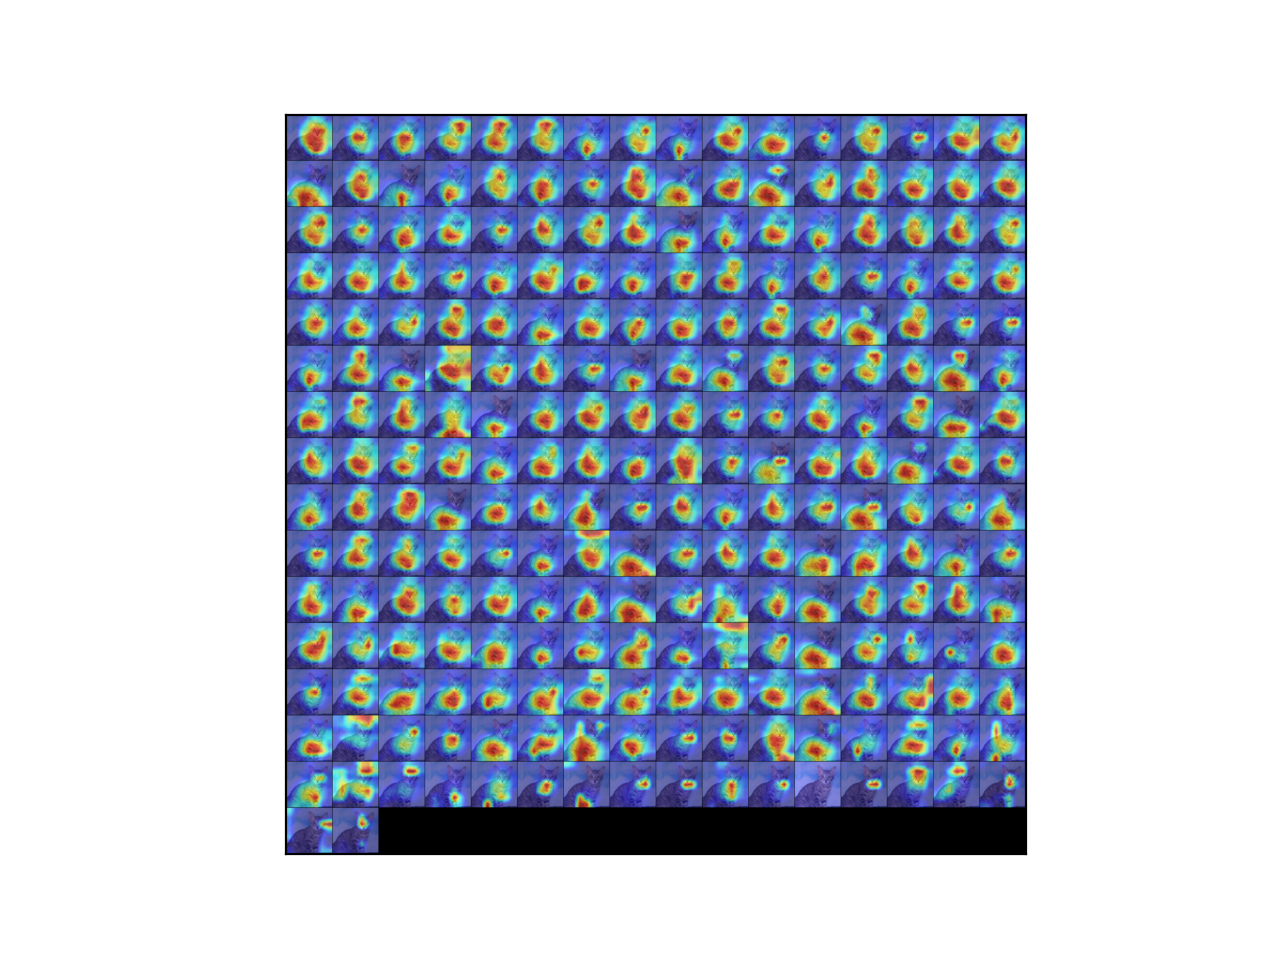

In [10]:
state = torch.load(ckptd/f'0_2022/epoch{epoch}.pkl')
model.load_state_dict(state['model'])
gcams = calc_grad_cam(image, model, layer=layer, label=label)
print(len(gcams))
imshow(make_grid(gcams))

278


<IPython.core.display.Javascript object>


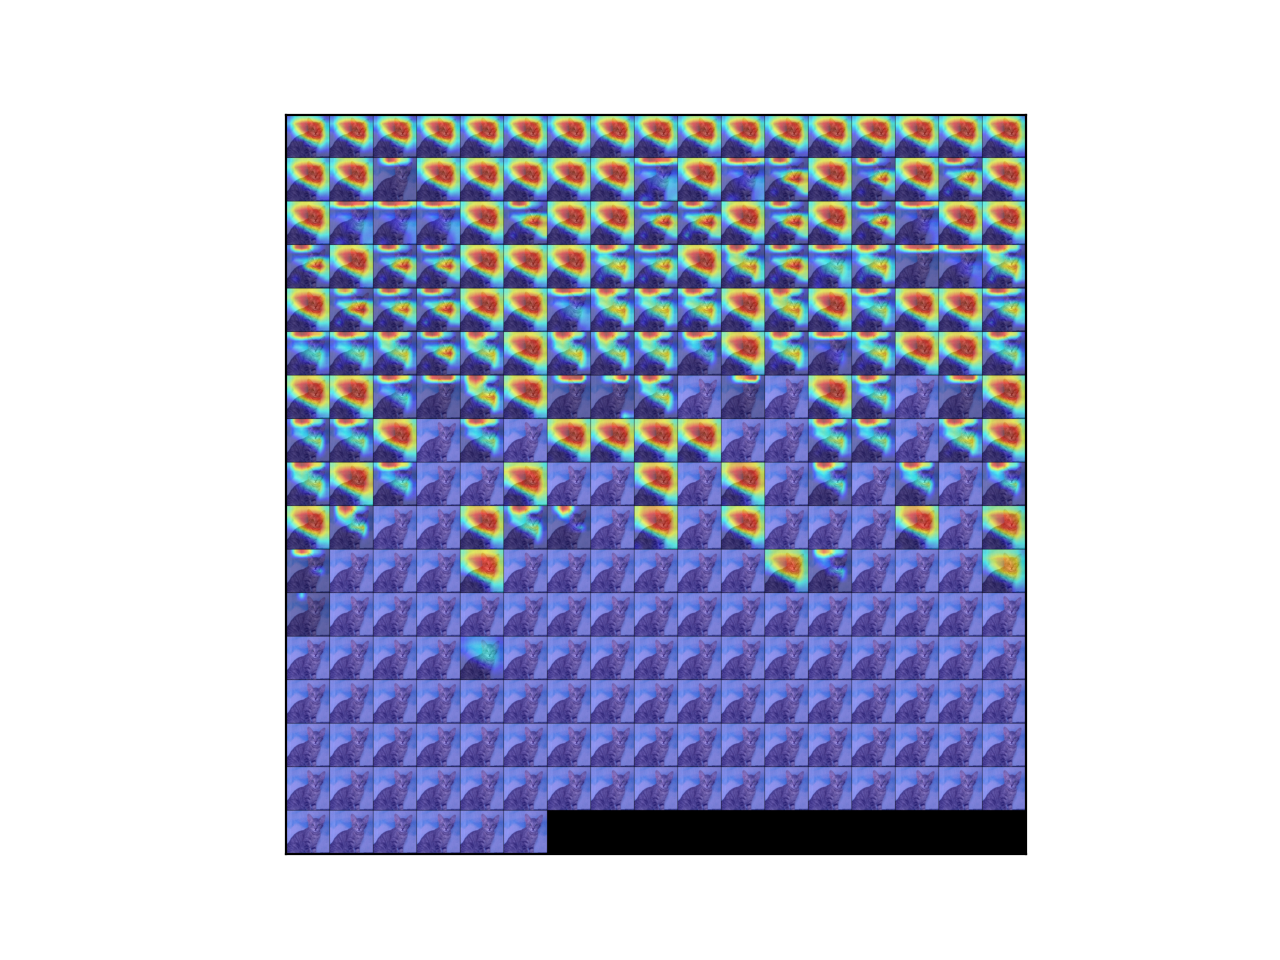

In [11]:
state = torch.load(ckptd/f'1_2022/epoch{epoch}.pkl')
model.load_state_dict(state['model'])
gcams = calc_grad_cam(image, model, layer=layer, label=label)
print(len(gcams))
imshow(make_grid(gcams))

258


<IPython.core.display.Javascript object>


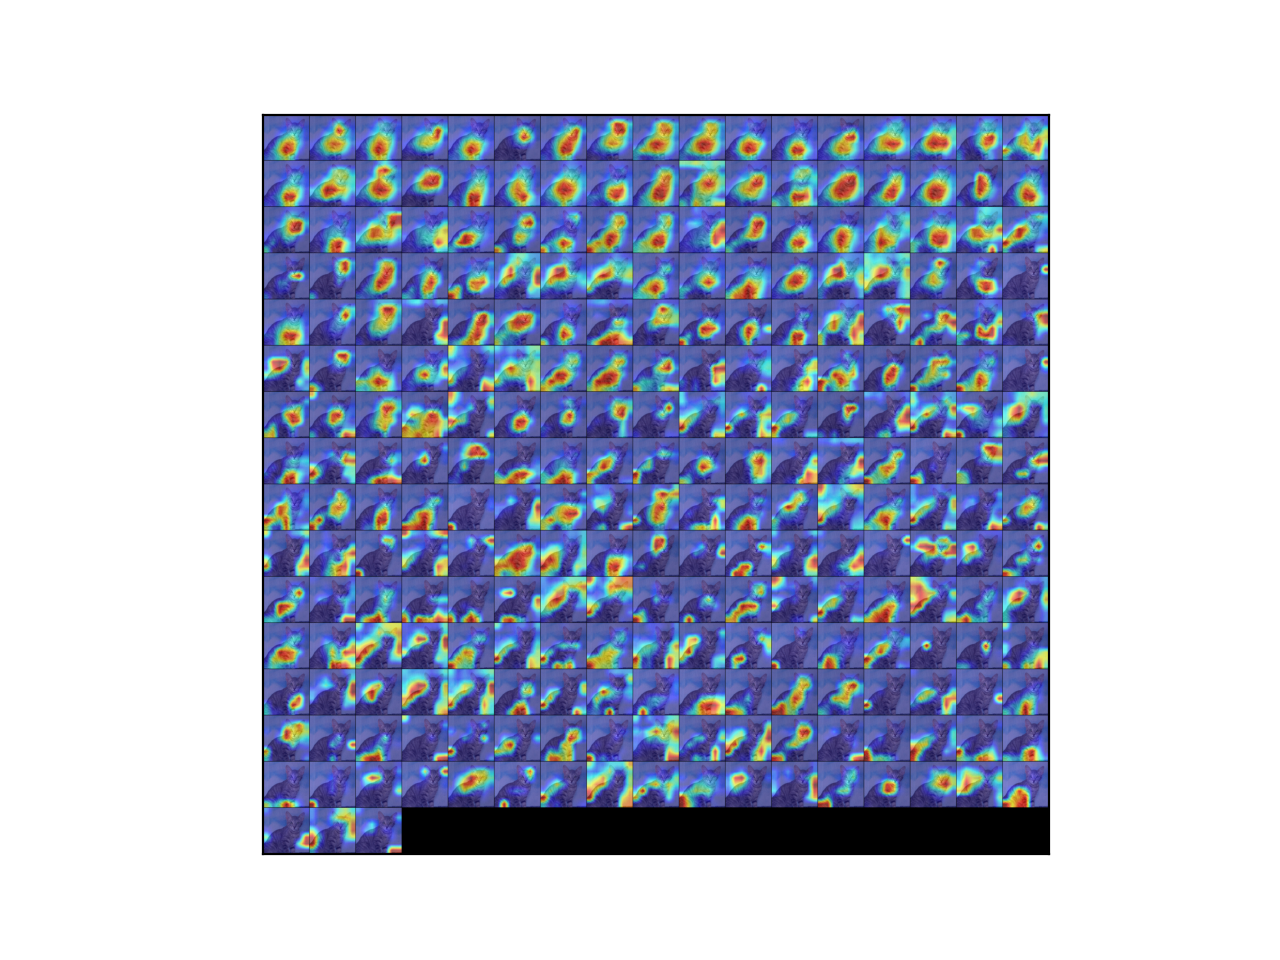

In [12]:
# state = torch.load(ckptd/f'5_2022/epoch{epoch}.pkl')
state = torch.load(f'/projects/CWCL/ckpts/dogcat.clean/5_2022/epoch{epoch}.pkl')
model.load_state_dict(state['model'])
gcams = calc_grad_cam(image, model, layer=layer, label=label)
print(len(gcams))
imshow(make_grid(gcams))

267


<IPython.core.display.Javascript object>


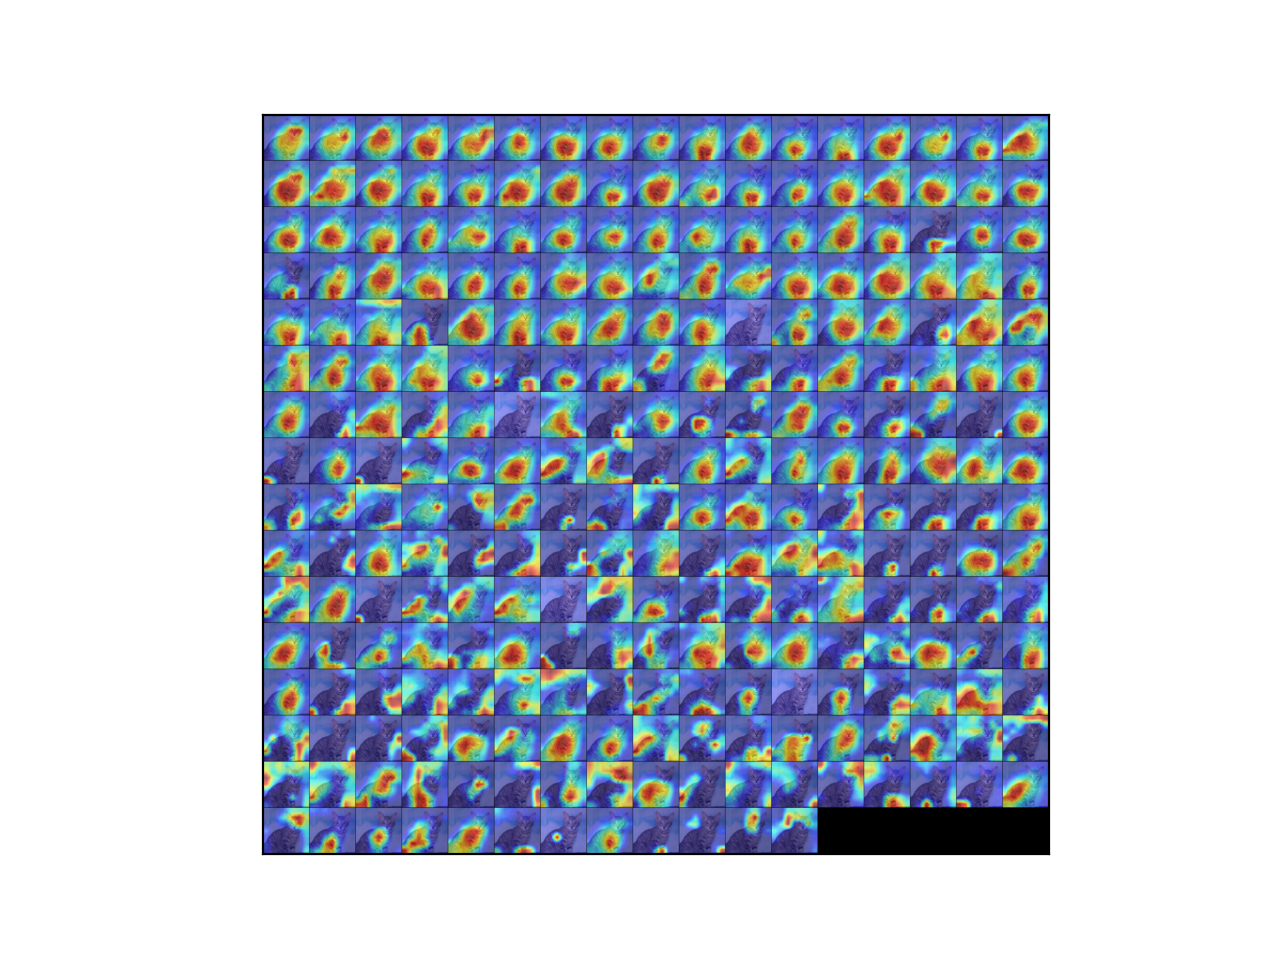

In [13]:
# state = torch.load(ckptd/f'3_2022/epoch{epoch}.pkl')
state = torch.load(f'/projects/CWCL/ckpts/dogcat.clean/3_2022/epoch{epoch}.pkl')
model.load_state_dict(state['model'])
gcams = calc_grad_cam(image, model, layer=layer, label=label)
print(len(gcams))
imshow(make_grid(gcams))